##### A Comprehensive Guide to Ensemble Learning (with Python codes)

#### DATA PRE-PROCESSING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier

In [4]:
df = pd.read_csv('heart.csv')    # loading the dataset
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df = df.dropna()

In [7]:
df = df.rename(columns={"AHD": "target"})

In [8]:
df['ChestPain'].replace(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
                        [0, 1, 2, 3], inplace=True)

In [9]:
df['target'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [10]:
df['Thal'].replace(['fixed', 'normal', 'reversable'], [0, 1, 2], inplace=True)

In [11]:
# Creating X and y for training
X = df.drop('target', axis = 1)
y = df['target']

In [12]:
# 20 % training dataset is considered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
# initializing sc object
sc = StandardScaler()

# variables that needed to be transformed
var_transform = ['Thal', 'Age', 'RestBP', 'Oldpeak', 'Chol']
X_train[var_transform] = sc.fit_transform(X_train[var_transform])   # standardizing training data
X_test[var_transform] = sc.transform(X_test[var_transform])            # standardizing test data
print(X_train.head())

          Age  Sex  ChestPain    RestBP      Chol  Fbs  RestECG  MaxHR  ExAng  \
277 -1.741679    0          2  0.319284 -0.544213    0        0    152      0   
262  0.601114    0          0  0.985981 -0.161771    0        0    171      0   
30   1.605169    0          0  0.430400 -0.180893    0        0    151      0   
22   0.377991    1          3 -0.680763  0.679601    0        2    160      0   
281 -0.849186    1          2 -0.125182  0.086816    0        0    179      0   

      Oldpeak  Slope   Ca      Thal  
277 -0.915041      2  0.0 -0.603035  
262 -0.121634      1  0.0 -0.603035  
30   0.671774      1  2.0 -0.603035  
22   0.671774      2  0.0 -0.603035  
281 -0.915041      1  0.0 -0.603035  


<ipython-input-13-28d9508e7817>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[var_transform] = sc.fit_transform(X_train[var_transform])   # standardizing training data
C:\Users\vishal.desai\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-13-28d9508e7817>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [14]:
X_train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
277,-1.741679,0,2,0.319284,-0.544213,0,0,152,0,-0.915041,2,0.0,-0.603035
262,0.601114,0,0,0.985981,-0.161771,0,0,171,0,-0.121634,1,0.0,-0.603035
30,1.605169,0,0,0.430400,-0.180893,0,0,151,0,0.671774,1,2.0,-0.603035
22,0.377991,1,3,-0.680763,0.679601,0,2,160,0,0.671774,2,0.0,-0.603035
281,-0.849186,1,2,-0.125182,0.086816,0,0,179,0,-0.915041,1,0.0,-0.603035


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### MAX VOTING

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
from statistics import mode

In [16]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

final_pred = np.array([])
for i in range(0, len(X_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

C:\Users\vishal.desai\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
y_test.shape

(60,)

In [18]:
pd.DataFrame(final_pred)

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,0.0
8,1.0
9,0.0


In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state = 1)
model2 = tree.DecisionTreeClassifier(random_state = 1)
model = VotingClassifier(estimators = [('lr', model1), ('dt', model2)], voting = 'hard')
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\vishal.desai\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.75

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Averaging

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred = (pred1 + pred2 + pred3) / 3

C:\Users\vishal.desai\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
pd.DataFrame(finalpred)

,0,1
0,0.922209,0.077791
1,0.466454,0.533546
2,0.928429,0.071571
3,0.003686,0.996314
4,0.978284,0.021716
5,0.265165,0.734835
6,0.616203,0.383797
7,0.682170,0.317830
8,0.192304,0.807696
9,0.520221,0.479779


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### WEIGHTED AVERAGE

In [23]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred = (pred1 * 0.3 + pred2 * 0.3 + pred3 * 0.4)

C:\Users\vishal.desai\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
pd.DataFrame(finalpred)

,0,1
0,0.926651,0.073349
1,0.499745,0.500255
2,0.934115,0.065885
3,0.004423,0.995577
4,0.973941,0.026059
5,0.298198,0.701802
6,0.639444,0.360556
7,0.658604,0.341396
8,0.190765,0.809235
9,0.544265,0.455735


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### ADVANCED ENSEMBLE TECHNIQUE

#### STACKING

##### 1. The train set is split into 10 parts.
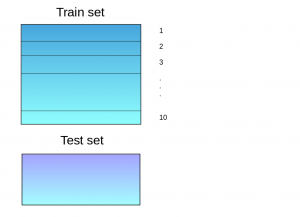

##### 2. A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.
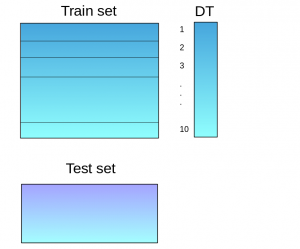

##### 3. The base model (in this case, decision tree) is then fitted on the whole train dataset.
##### Using this model, predictions are made on the test set.
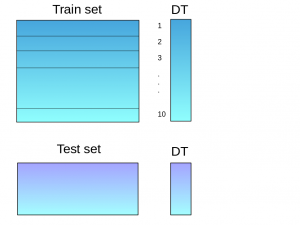

##### 5. Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.
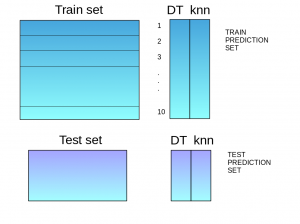

##### 6. The predictions from the train set are used as features to build a new model.
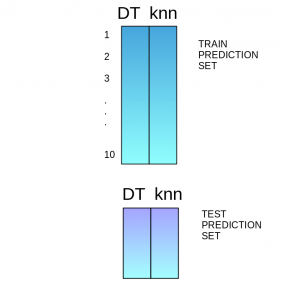

##### 7. This model is used to make final predictions on the test prediction set.

In [25]:
from sklearn.model_selection import StratifiedKFold

In [26]:
def Stacking(model, train, y, test, n_fold):
    folds = StratifiedKFold(n_splits = n_fold, random_state = None)
    test_pred = np.empty((test.shape[0], 1), float)
    train_pred = np.empty((0, 1), float)
    for train_indices, val_indices in folds.split(train, y.values):
        X_train, x_val = train.iloc[train_indices], train.iloc[val_indices]
        y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]
        
        model.fit(X = X_train, y = y_train)
        train_pred = np.append(train_pred, model.predict(x_val))
        test_pred = np.append(test_pred, model.predict(test))
    return test_pred.reshape(-1, 1), train_pred

In [27]:
model1 = tree.DecisionTreeClassifier()

test_pred1, train_pred1 = Stacking(model = model1, n_fold = 10, train = X_train, test = X_test, y = y_train)

train_pred1 = pd.DataFrame(train_pred1)
test_pred1 = pd.DataFrame(test_pred1)

In [28]:
model2 = KNeighborsClassifier()

test_pred2, train_pred2 = Stacking(model = model2, n_fold = 10, train = X_train, test = X_test, y = y_train)

train_pred2 = pd.DataFrame(train_pred2)
test_pred2 = pd.DataFrame(test_pred2)

In [33]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,0


In [ ]:
df_new = pd.concat([train_pred1, train_pred2], axis = 1)
df_new_test = pd.concat([test_pred1, test_pred2], axis = 1)

model = LogisticRegression(random_state = 1)
model.fit(df_new, y_train)
model.score(df_new_test, y_test)

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### BLENDING

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -